In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
keys = ['key%04d' % i for i in range(1000)]
keys[:5]

['key0000', 'key0001', 'key0002', 'key0003', 'key0004']

In [3]:
n = 50

In [4]:
%%timeit -n10
for key in keys:
    hash(key)

10 loops, best of 3: 80.7 µs per loop


In [5]:
builtin_hashes = [hash(key) % n for key in keys]

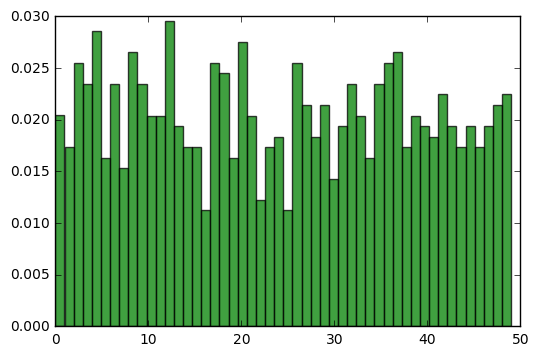

In [6]:
plt.hist(builtin_hashes, n, normed=1, facecolor='g', alpha=0.75)
plt.show()

In [7]:
pd.DataFrame(builtin_hashes).describe()

,0
count,1000.000000
mean,24.128000
std,14.610787
min,0.000000
25%,11.000000
50%,24.000000
75%,37.000000
max,49.000000


In [8]:
import hashlib

In [9]:
%%timeit -n10
for key in keys:
    int(hashlib.md5(key.encode('ascii')).hexdigest(), 16)

10 loops, best of 3: 1.74 ms per loop


In [10]:
hashlib_hashes = [int(hashlib.md5(key.encode('ascii')).hexdigest(), 16) % n for key in keys]

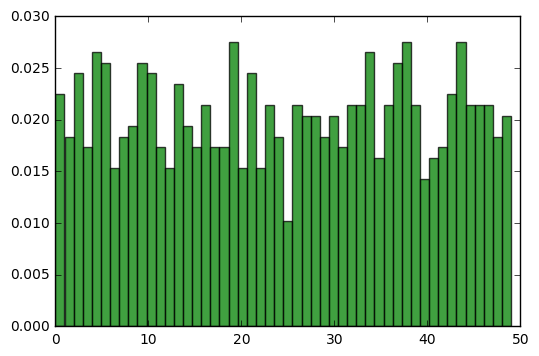

In [11]:
plt.hist(hashlib_hashes, n, normed=1, facecolor='g', alpha=0.75)
plt.show()

In [12]:
pd.DataFrame(hashlib_hashes).describe()

,0
count,1000.000000
mean,24.545000
std,14.639067
min,0.000000
25%,11.750000
50%,25.000000
75%,37.000000
max,49.000000
